# PRCP-1025-FlightPricePrediction

### Problem Statement
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travelers saying that flight ticket prices are so unpredictable. That’s why we will try to use machine learning to solve this problem. This can help airlines by predicting what prices they can maintain. 

Task 1:-Prepare a complete data analysis report on the given data.

Task 2:-Create a predictive model which will help the customers to predict future flight prices and plan their journey accordingly.


### Dataset Link:
We have to analyze the flight fare prediction using Machine Learning dataset using essential exploratory data analysis techniques then will draw some predictions about the price of the flight based on some features such as what type of airline it is, what is the arrival time, what is the departure time, what is the duration of the flight, source, destination and more
Link : https://d3ilbtxij3aepc.cloudfront.net/projects/CDS-Capstone-Projects/flight-fare.zip


### Attribute Information : 

    1.	Airline: So this column will have all the types of airlines like Indigo, Jet Airways, Air India, and many more.
    2.	Date_of_Journey: This column will let us know about the date on which the passenger’s journey will start.
    3.	Source: This column holds the name of the place from where the passenger’s journey will start.
    4.	Destination: This column holds the name of the place to where passengers wanted to travel.
    5.	Route: Here we can know about what the route is through which passengers have opted to travel from his/her source to their destination.
    6.	Arrival_Time: Arrival time is when the passenger will reach his/her destination.
    7.	Duration: Duration is the whole period that a flight will take to complete its journey from source to destination.
    8.	Total_Stops: This will let us know in how many places flights will stop there for the flight in the whole journey.
    9.	Additional_Info: In this column, we will get information about food, kind of food, and other amenities.
    10.	Price: Price of the flight for a complete journey including all the expenses before onboarding.


## Model Comparison Report

Create a report stating the performance of multiple models on this data and suggest the best model for production.


## Report on Challenges faced

Create a report which should include challenges you faced on data and what technique used with proper reason.

Note:-All above tasks have been created on a single jupyter notebook and share the same while final submission of project.


In [1]:
#Importing necessory libraries required
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loding Dataset
data=pd.read_excel('Flight_Fare.xlsx')

# Display Maximum Columns
pd.set_option('display.max_columns',None)

# Basic Chacks

In [3]:
data.size

117513

In [4]:
data.shape

(10683, 11)

In [5]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [7]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [9]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [10]:
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [11]:
data.describe(include='O')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


In [12]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

# Data preprocessing

### Checking for duplicates

In [24]:
data.duplicated().sum()

220

In [25]:
data.drop_duplicates(inplace=True)

**Remove all duplicated values**

### Replace Null Values

In [26]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [27]:
data[data['Total_Stops'].isnull()==True]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [28]:
data.iloc[9039]

Airline                IndiGo
Date_of_Journey    24/05/2019
Source               Banglore
Destination             Delhi
Route               BLR → DEL
Dep_Time                18:25
Arrival_Time            21:20
Duration               2h 55m
Total_Stops          non-stop
Additional_Info       No info
Price                    4823
Name: 9192, dtype: object

In [29]:
## Dropping the Nan values
data.dropna(inplace=True)

In [30]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

Remove NULL values in the dataset

# Exploratory Data Analysis (EDA)

## Univariate Analysis

In [20]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [21]:
import sweetviz as sv  #  library for univariant analysis
my_report =  sv.analyze(data) # pass the original dataframe
my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Insights from univariant analysis

Numerical columns:

    * Price :
    Price range between 1759 and 79512.
    data is right skewed
    No missing values.  

## Bivariate Analysis

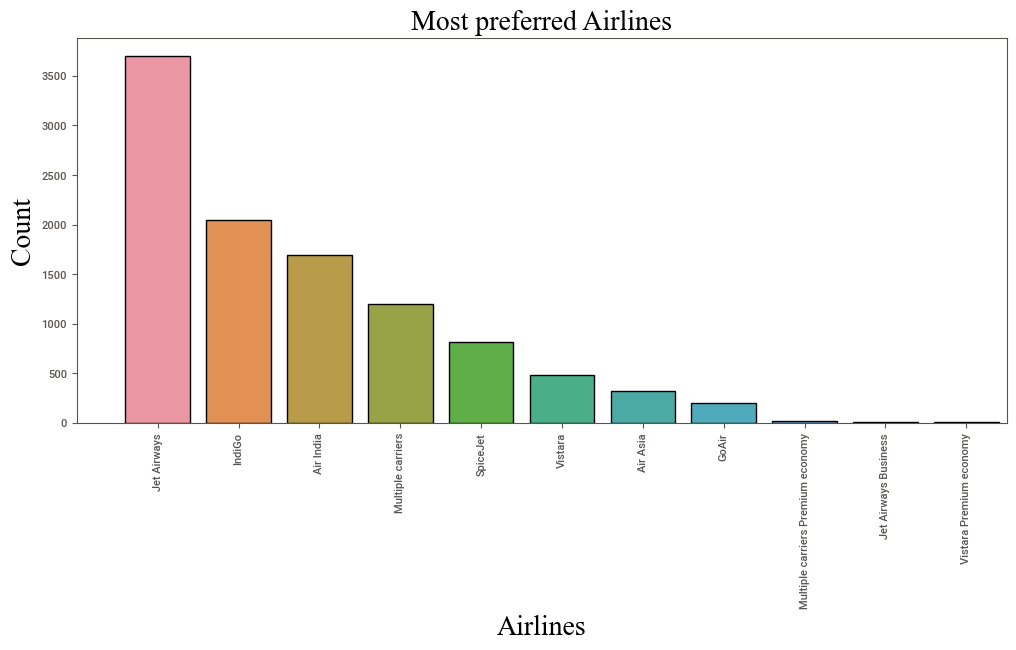

In [22]:
plt.figure(figsize=(12,5))
sns.countplot(x="Airline", data=data,order = data['Airline'].value_counts().index,ec = "black")
font_style={'family':'times new roman','size':20,'color':'black'}
plt.title("Most preferred Airlines",fontdict=font_style)
plt.ylabel("Count",fontdict=font_style)
plt.xlabel("Airlines",fontdict=font_style)
plt.xticks(rotation= 90)
plt.xlim(-1,10.5)
plt.show()

##### Insights
- "Jet Airways Business" tickets are the most expensive ones.

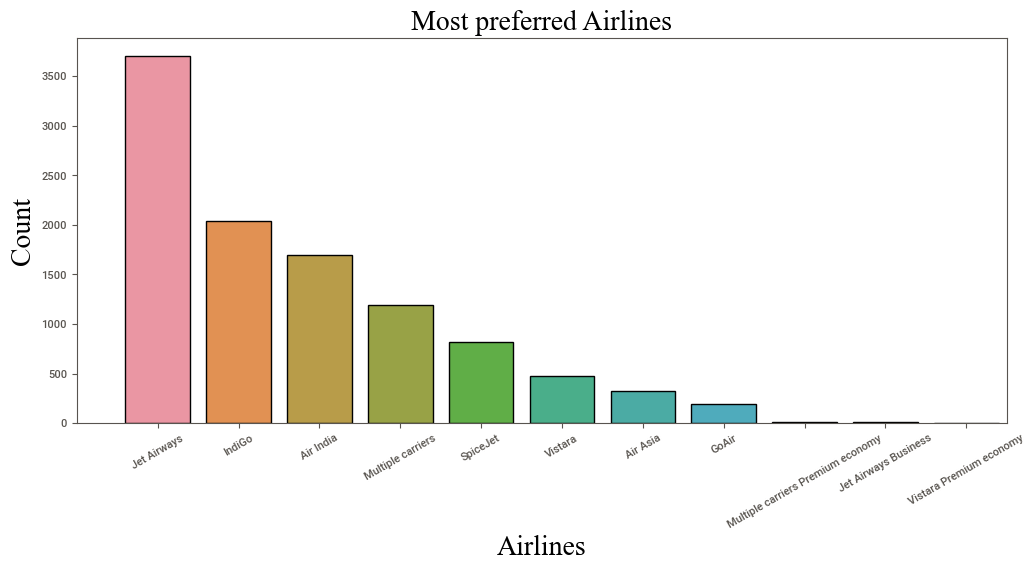

In [23]:
plt.figure(figsize=(12,5))
sns.countplot(x="Airline", data=data,order = data['Airline'].value_counts().index,ec = "black")
font_style={'family':'times new roman','size':20,'color':'black'}
plt.title("Most preferred Airlines",fontdict=font_style)
plt.ylabel("Count",fontdict=font_style)
plt.xlabel("Airlines",fontdict=font_style)
plt.xticks(rotation= 30)
plt.xlim(-1,10.5)
plt.show()

##### Insights
* Jet Airways is the most preferred airline with the highest row count,followed by Indigo and AirIndia
* Jet Airways business is the costliest airways.
* Count for Vistara Premium economy,Trujet,Multiple carries premium economy and Jet airways business     is quite low.

**Airline vs flightticket price**

In [24]:
airlines = data.groupby('Airline').Price.max()
airlines_df= airlines.to_frame().sort_values('Price',ascending=False)[0:10]
airlines_df

,Price
Airline,
Jet Airways Business,79512
Jet Airways,54826
Multiple carriers,36983
Air India,31945
SpiceJet,23267
GoAir,22794
IndiGo,22153
Vistara,21730
Multiple carriers Premium economy,14629


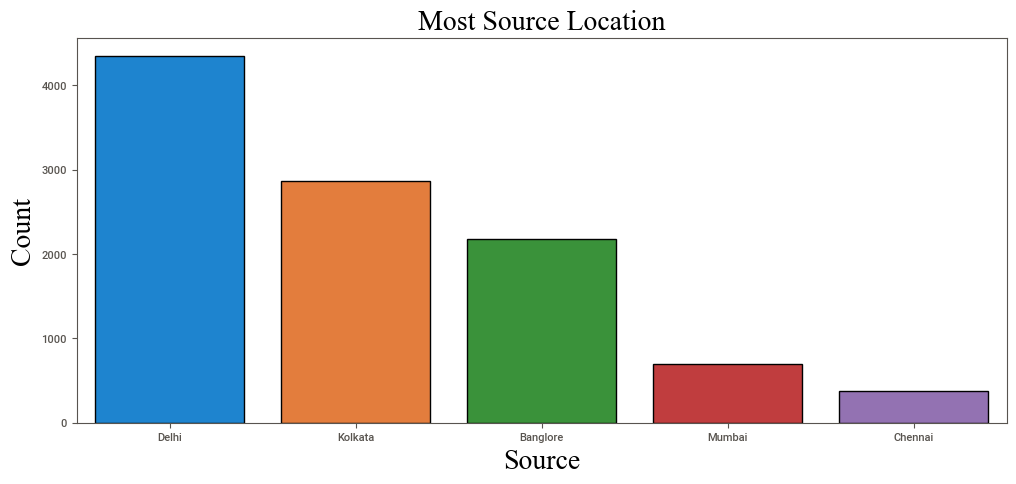

In [25]:
plt.figure(figsize=(12,5))
sns.countplot(x="Source", data=data,order = data['Source'].value_counts().index,ec = "black")
plt.title("Most Source Location",fontdict=font_style)
plt.ylabel("Count",fontdict=font_style)
plt.xlabel("Source",fontdict=font_style)
plt.show()

##### Insights
* Mostely flight are sourse location are Delhi

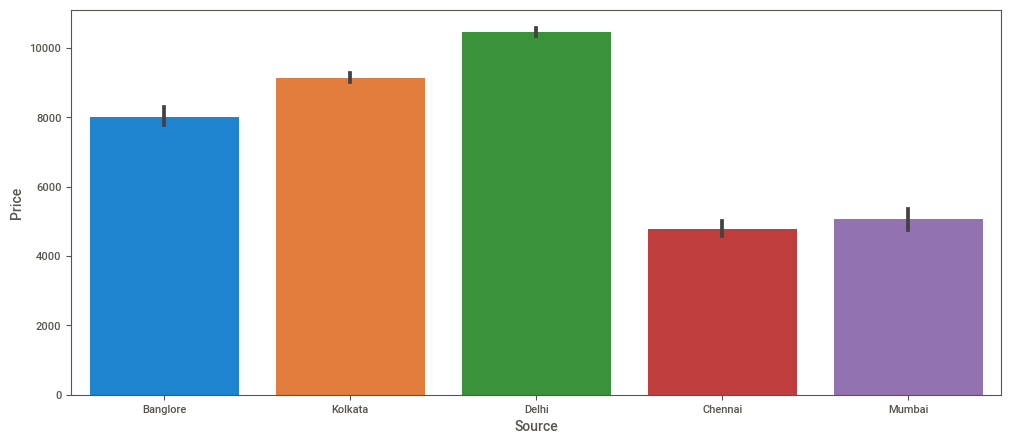

In [26]:
plt.figure(figsize=(12,5))
sns.barplot(x=data['Source'],y=data['Price'],data=data)
plt.show()

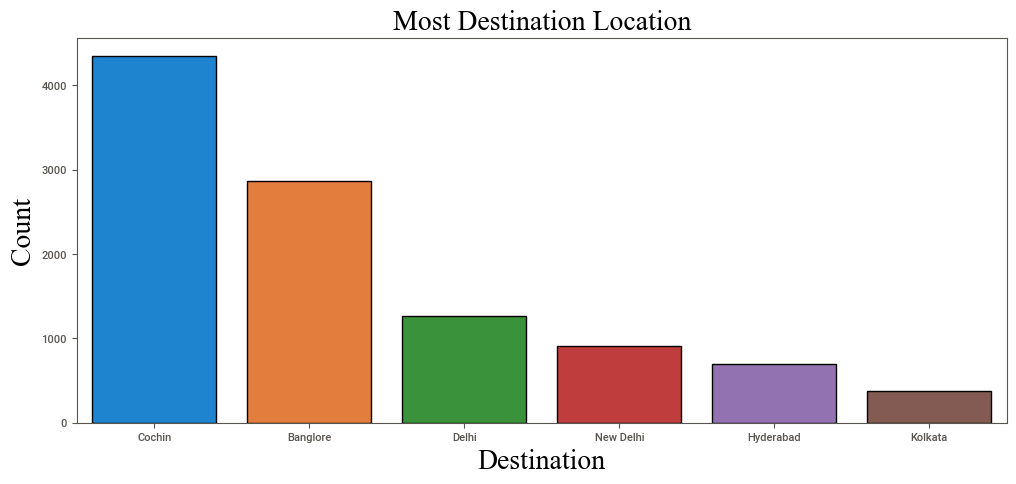

In [27]:
plt.figure(figsize=(12,5))
sns.countplot(x="Destination", data=data,order = data['Destination'].value_counts().index,ec = "black")
plt.title("Most Destination Location",fontdict=font_style)
plt.ylabel("Count",fontdict=font_style)
plt.xlabel("Destination",fontdict=font_style)
plt.show()

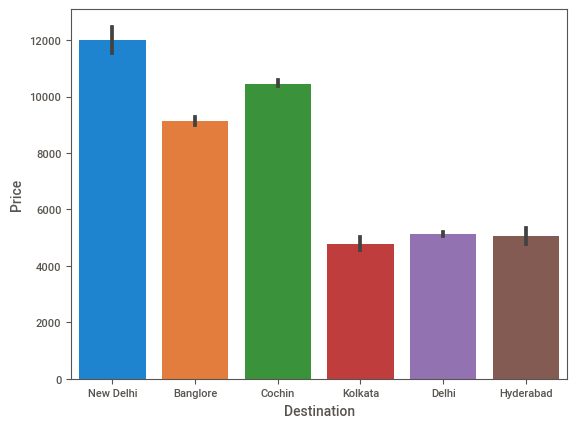

In [28]:
sns.barplot(x=data['Destination'],y=data['Price'],data=data)
plt.show()

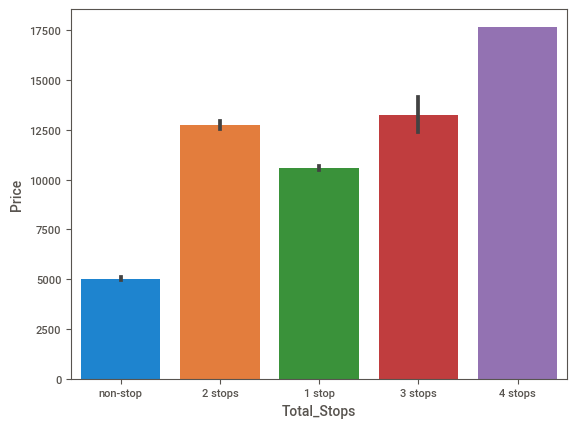

In [29]:
sns.barplot(x=data['Total_Stops'],y=data['Price'],data=data)
plt.show()

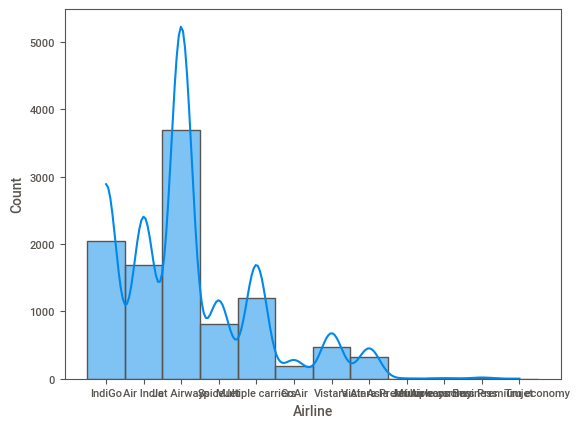

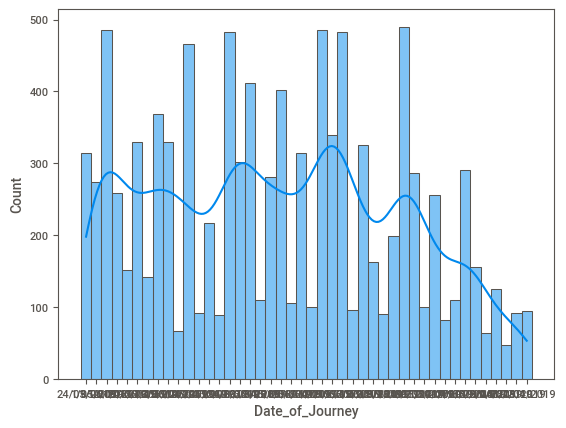

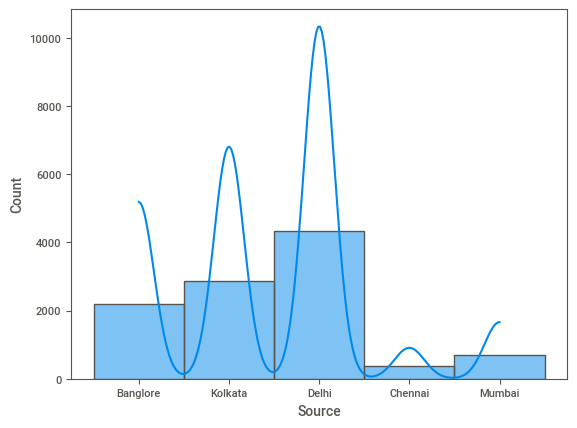

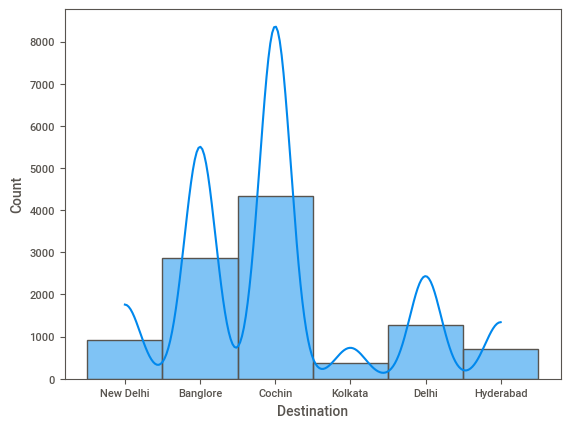

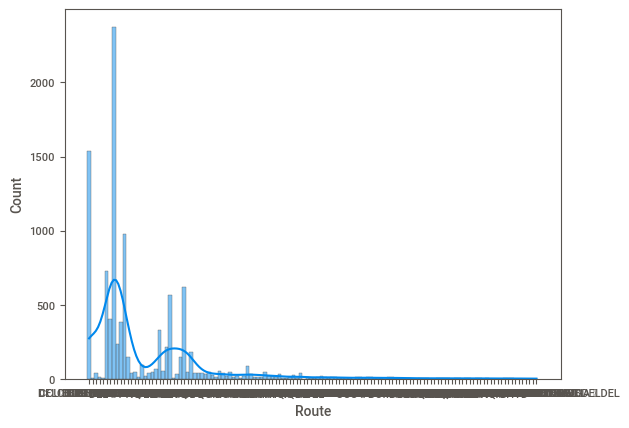

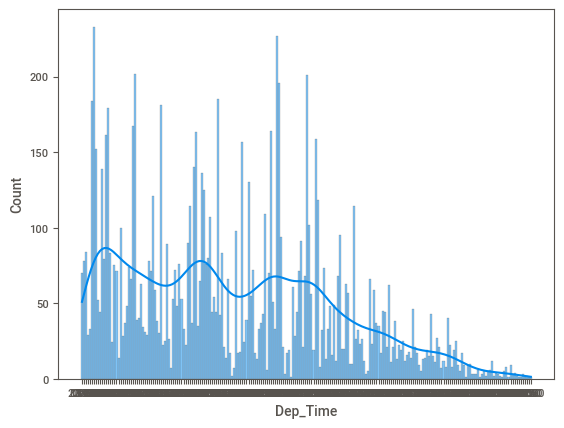

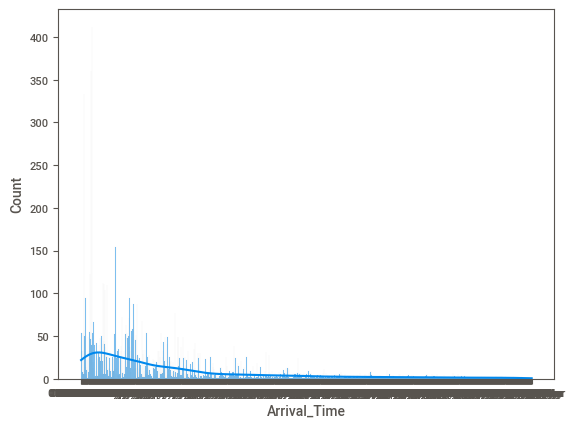

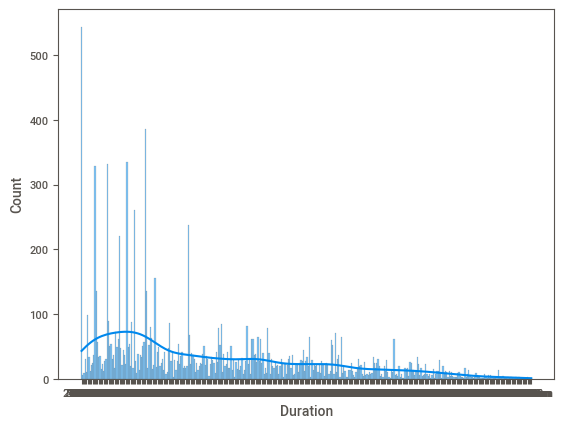

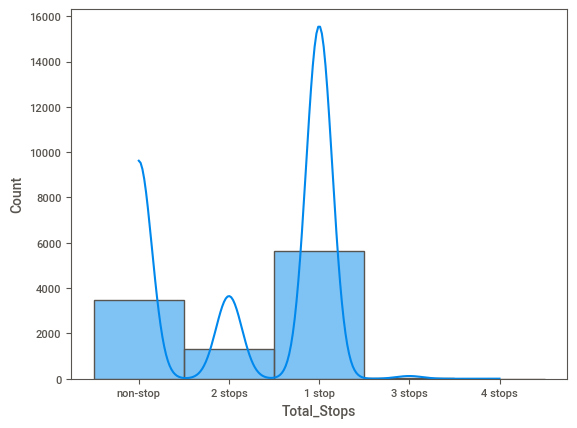

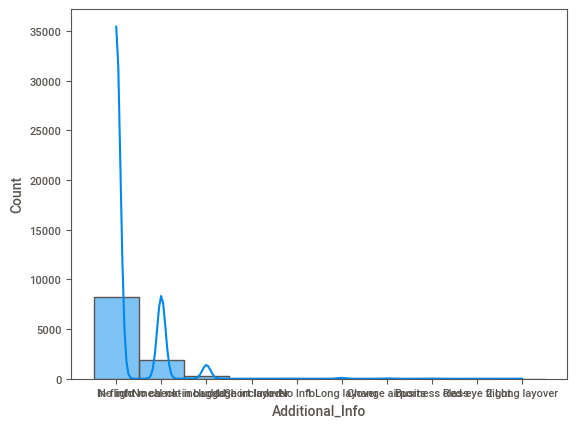

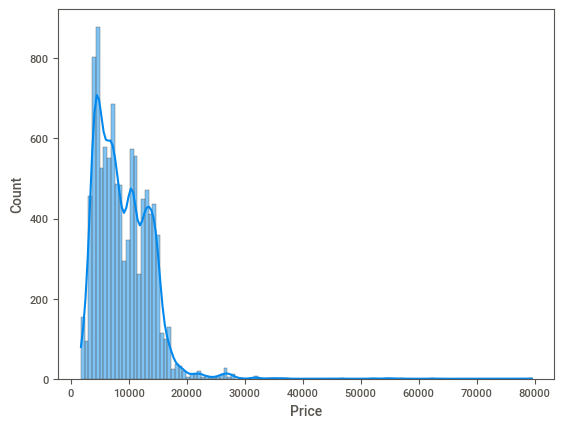

In [30]:
for columns in data:
  sns.histplot(x=columns, data=data,kde=True)
  plt.show()

## Multivariate Analysis

#### Price on Weekdays vs Weekends

In [31]:
days_df = data[['Airline','Date_of_Journey', 'Price']].copy()
days_df.head()

,Airline,Date_of_Journey,Price
0,IndiGo,24/03/2019,3897
1,Air India,1/05/2019,7662
2,Jet Airways,9/06/2019,13882
3,IndiGo,12/05/2019,6218
4,IndiGo,01/03/2019,13302


In [32]:
days_df['Date_of_Journey'] = pd.to_datetime(days_df['Date_of_Journey'],format='%d/%m/%Y')
days_df['Weekday'] = days_df['Date_of_Journey'].dt.day_name()
days_df['Weekend'] = days_df['Weekday'].apply(lambda day: 1 if day == 'Sunday' else 0)
days_df.head()

,Airline,Date_of_Journey,Price,Weekday,Weekend
0,IndiGo,2019-03-24,3897,Sunday,1
1,Air India,2019-05-01,7662,Wednesday,0
2,Jet Airways,2019-06-09,13882,Sunday,1
3,IndiGo,2019-05-12,6218,Sunday,1
4,IndiGo,2019-03-01,13302,Friday,0


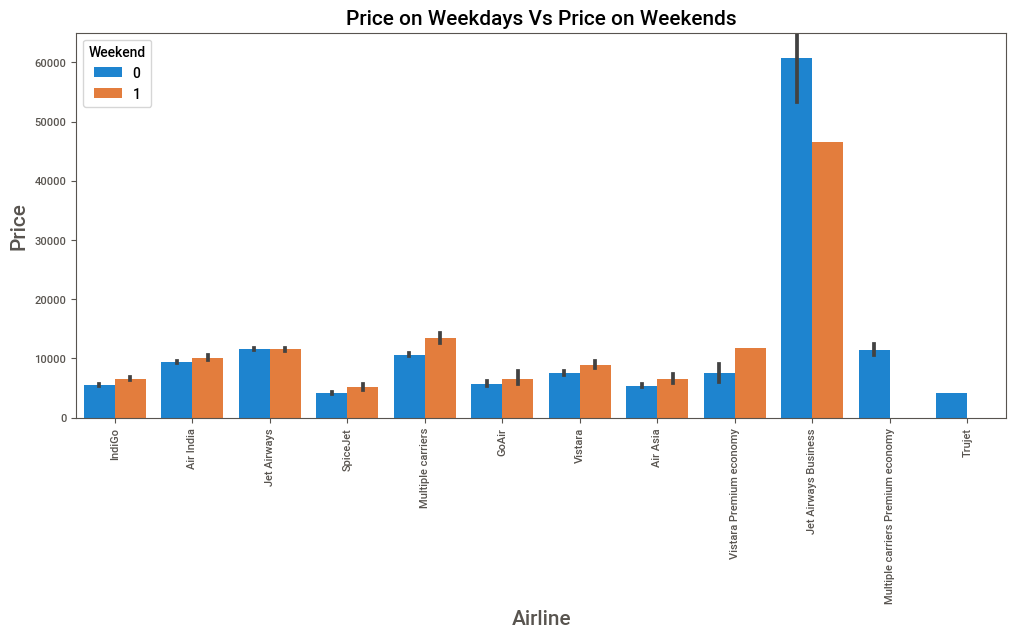

In [33]:
plt.subplots(figsize=(12,5))
sns.barplot(data=days_df,x='Airline',y='Price',hue='Weekend')
plt.xlabel("Airline",size = 15)
plt.xticks(rotation = 90)
plt.ylabel("Price",size = 15)
plt.title("Price on Weekdays Vs Price on Weekends",size = 15)
plt.legend(title='Weekend'.title())
plt.ylim(0,65000)
plt.show()

##### Insights
- The Price of tickets is higher on Weekends.

## Initial Analysis Report

* Jet Airways has highest customer footfall followed by Indigo and Air India.
* Jet Airways has a market share of 36.03% followed by Indigo has a market share of 19.22% and 
  Airindia which has market share of 16.40%.
* Delhi has highest footfall for source and Cochin has the highest footfall for Destination.

## Hendling datetime Data

### Date_of_Journey

In [34]:
data['Date_of_Journey']=pd.to_datetime(data['Date_of_Journey'])

In [35]:
data['Date_of_Journey'].dt.year.unique()

array([2019])

In [36]:
data['Journey_Day']=data['Date_of_Journey'].dt.day
data['Journey_Month']=data['Date_of_Journey'].dt.month

In [37]:
data.drop(['Date_of_Journey'],axis=1,inplace=True)
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


### Dep_Time

In [38]:
data['Dep_Time']=pd.to_datetime(data['Dep_Time'])
data['Dep_Time'].dtypes

dtype('<M8[ns]')

In [39]:
data['Dep_Time_in_hours']=data['Dep_Time'].dt.hour
data['Dep_Time_in_minutes']=data['Dep_Time'].dt.minute

In [40]:
data.drop(['Dep_Time'],axis=1,inplace=True)

In [41]:
data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Time_in_hours,Dep_Time_in_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


### Arrival_Time

In [42]:
data['Arrival_Time']=pd.to_datetime(data['Arrival_Time'])
data['Arrival_Time'].dtypes

dtype('<M8[ns]')

In [43]:
data['Arrival_Time_in_hours']=data['Arrival_Time'].dt.hour
data['Arrival_Time_in_minutes']=data['Arrival_Time'].dt.minute

In [44]:
data.drop(['Arrival_Time'],axis=1,inplace=True)

In [45]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


### Duration

In [46]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time


# Assigning and converting Duration column into list
duration = list(data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [47]:
# Adding duration_hours and duration_mins list to train_data dataframe

data["Duration_hours"] = duration_hours
data["Duration_mins"] = duration_mins

In [48]:
data.drop('Duration',axis=1,inplace=True)
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [49]:
# def convert_Duration(Duration):
#     if len(Duration.split())==2:
#         hours=int(Duration.split()[0][:-1])
#         minutes=int(Duration.split()[1][:-1])
#         return hours * 60 + minutes
#     else:
#         return int(Duration[:-1]) * 60

In [50]:
# data['Duration']=data['Duration'].apply(convert_Duration)
# data.head()

## Hendling Categorical Data

1. Nominal Data : Data are not in any order **OneHotEncoder** is used in this case
2. Ordinal Data : Data are in order **LabelEncoder** is used in this case

### Airline

In [31]:
data['Airline'].value_counts()

Airline
Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

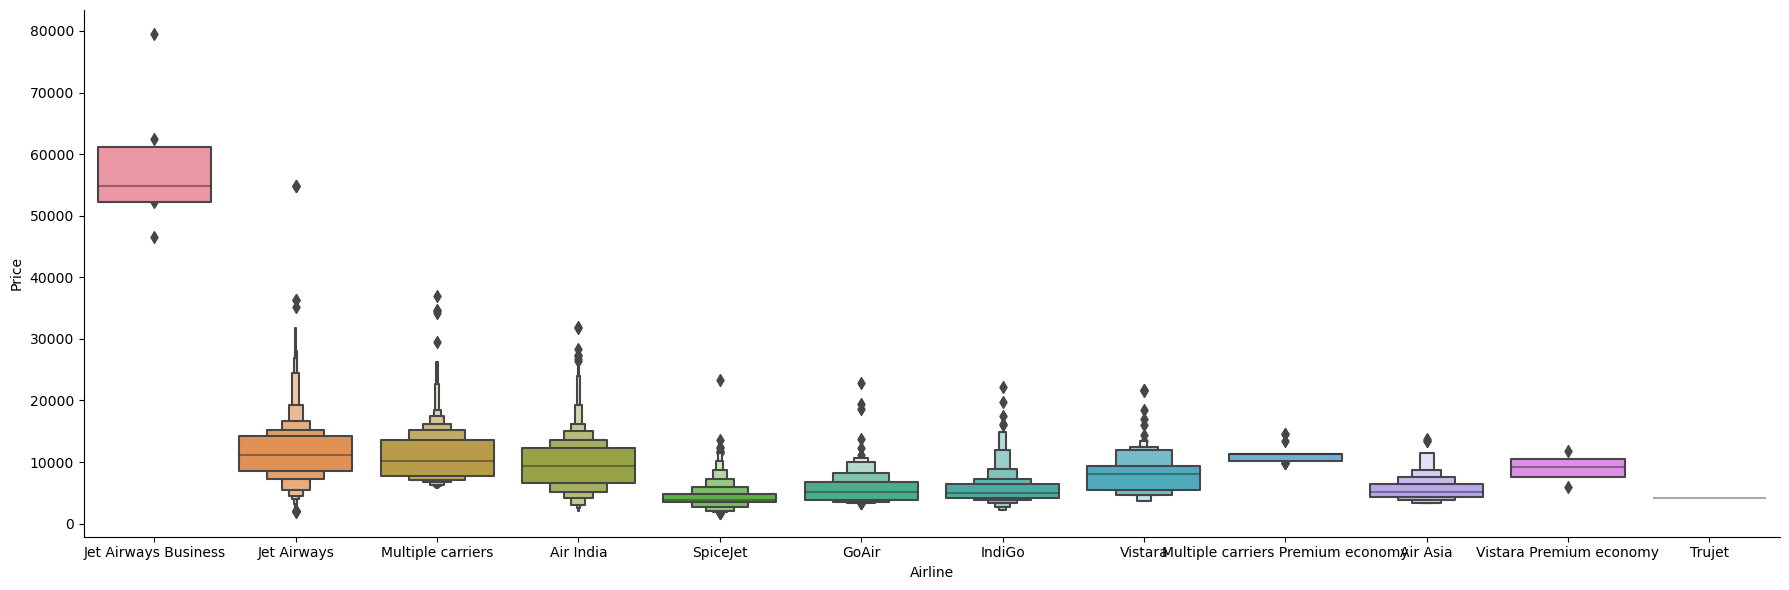

In [32]:
sns.catplot(y = "Price", x = "Airline", data = data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [33]:
data.groupby('Airline').describe()['Price'].sort_values('mean',ascending=False)

,count,mean,std,min,25%,50%,75%,max
Airline,,,,,,,,
Jet Airways Business,6.0,58358.666667,11667.596748,46490.0,52243.00,54747.0,61122.50,79512.0
Jet Airways,3700.0,11599.021081,4315.671402,1840.0,8586.00,11134.0,14151.00,54826.0
Multiple carriers Premium economy,13.0,11418.846154,1717.153936,9845.0,10161.00,11269.0,11269.00,14629.0
Multiple carriers,1196.0,10902.678094,3721.234997,5797.0,7723.00,10197.0,13587.00,36983.0
Air India,1694.0,9556.608028,3937.875634,2050.0,6597.75,9316.0,12199.00,31945.0
Vistara Premium economy,3.0,8962.333333,2915.405518,5969.0,7547.00,9125.0,10459.00,11793.0
Vistara,478.0,7801.355649,2915.288625,3687.0,5403.00,7980.0,9345.00,21730.0
GoAir,194.0,5861.056701,2703.585767,3398.0,3898.00,5135.0,6811.25,22794.0
IndiGo,2043.0,5668.469897,2266.933697,2227.0,4226.00,5000.0,6493.00,22153.0


In [36]:
Airline=data[['Airline']]
Airline=pd.get_dummies(Airline)
Airline.head()

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,False,False,False,True,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False


In [11]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

data=pd.concat([data,Airline],axis=1)
data.drop('Airline',axis=1,inplace=True)
data.head()

,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,False,False,True,False,False,False,False,False,False,False,False
1,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,True,False,False,False,False,False,False,False,False,False,False
2,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,False,False,False,True,False,False,False,False,False,False,False
3,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,False,False,True,False,False,False,False,False,False,False,False
4,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,False,False,True,False,False,False,False,False,False,False,False


### Source

In [56]:
data['Source'].value_counts()

Source
Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: count, dtype: int64

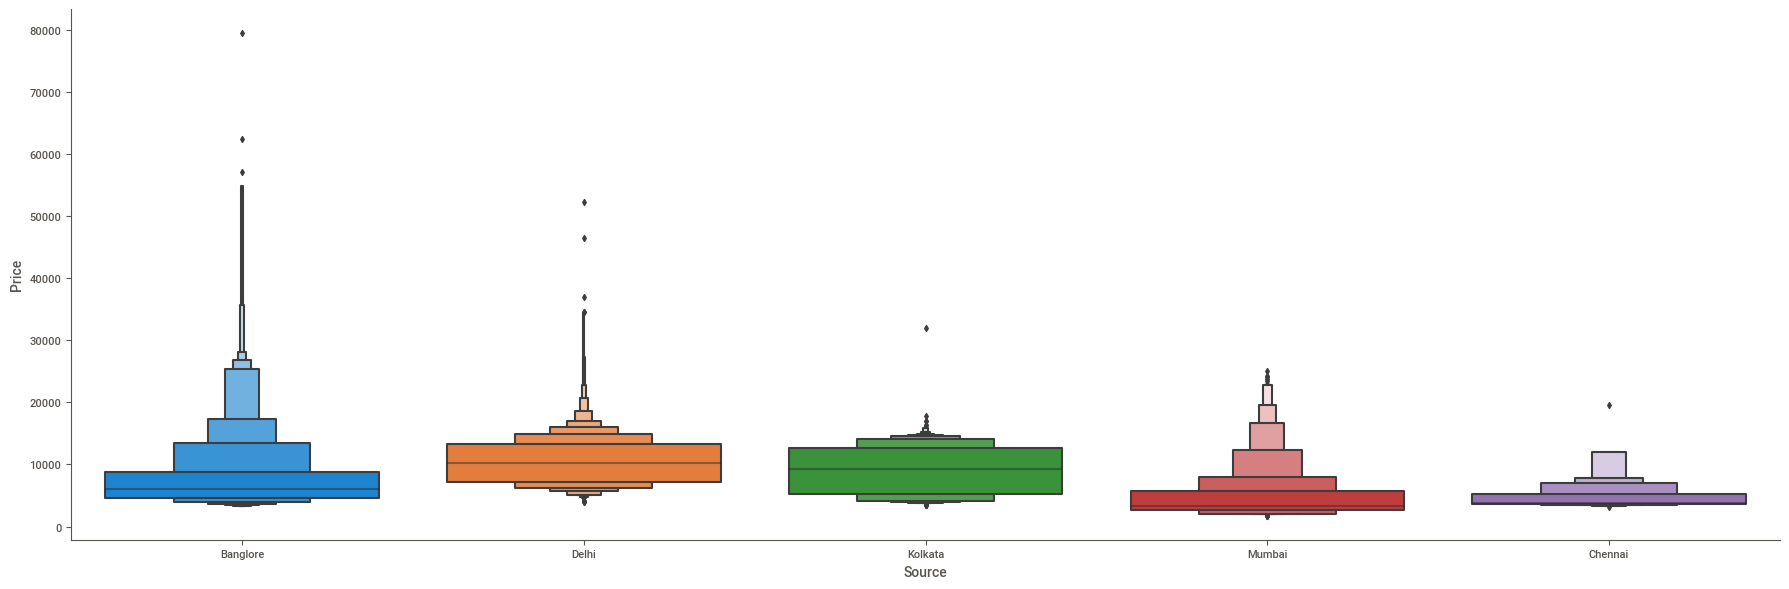

In [57]:
sns.catplot(y = "Price", x = "Source", data = data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [58]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Source = data[["Source"]]
Source = pd.get_dummies(Source, drop_first = True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,False,False,False,False
1,False,False,True,False
2,False,True,False,False
3,False,False,True,False
4,False,False,False,False


In [59]:
data=pd.concat([data,Source],axis=1)
data.drop('Source',axis=1,inplace=True)
data.head()

,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
1,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False
3,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False
4,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False


### Destination

In [60]:
data['Destination'].value_counts()

Destination
Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

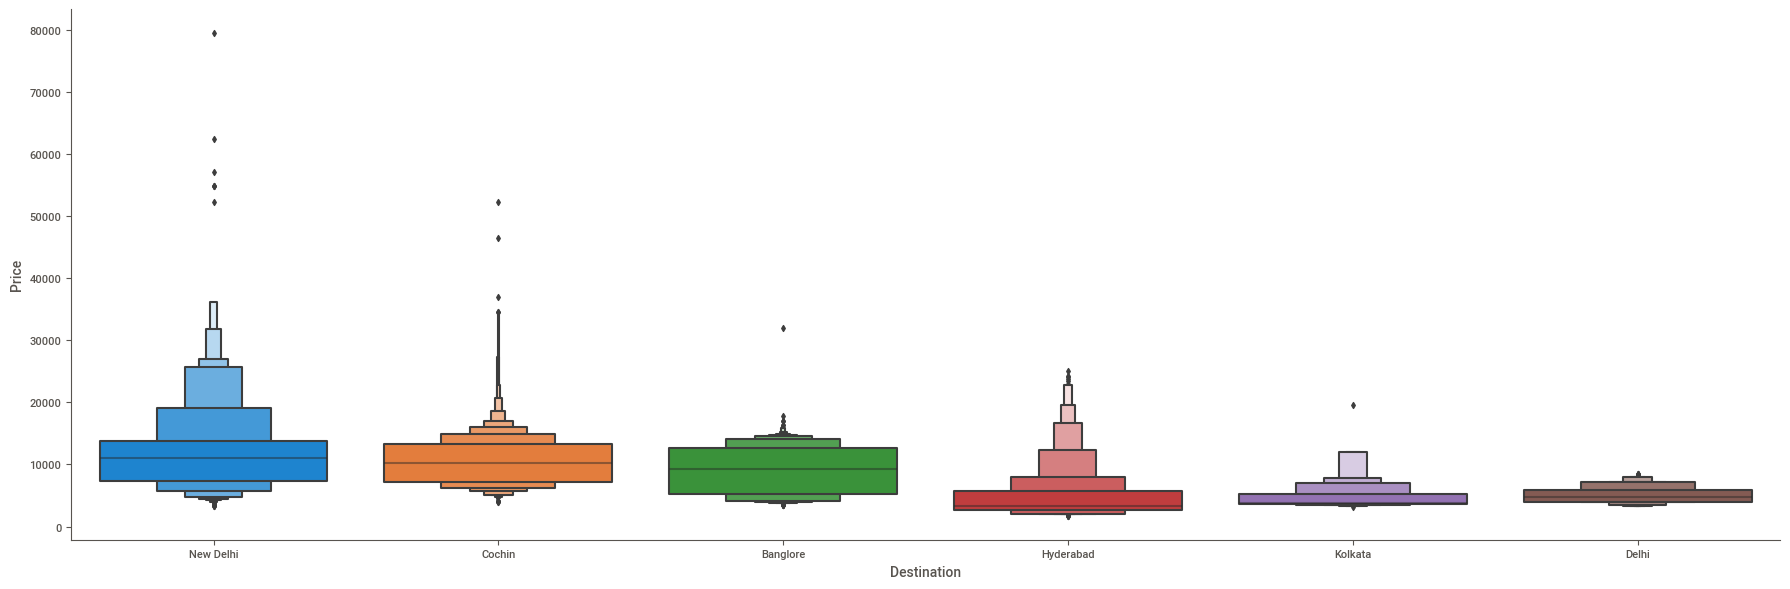

In [61]:
sns.catplot(y = "Price", x = "Destination", data = data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [62]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = data[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,False,False,False,False,True
1,False,False,False,False,False
2,True,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,True


In [63]:
data=pd.concat([data,Destination],axis=1)
data.drop('Destination',axis=1,inplace=True)
data.head()

,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
3,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


### Route

In [64]:
route=data[['Route']]
route.head()

,Route
0,BLR → DEL
1,CCU → IXR → BBI → BLR
2,DEL → LKO → BOM → COK
3,CCU → NAG → BLR
4,BLR → NAG → DEL


### Total_Stops

In [65]:
data['Total_Stops'].value_counts()

Total_Stops
1 stop      5625
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: count, dtype: int64

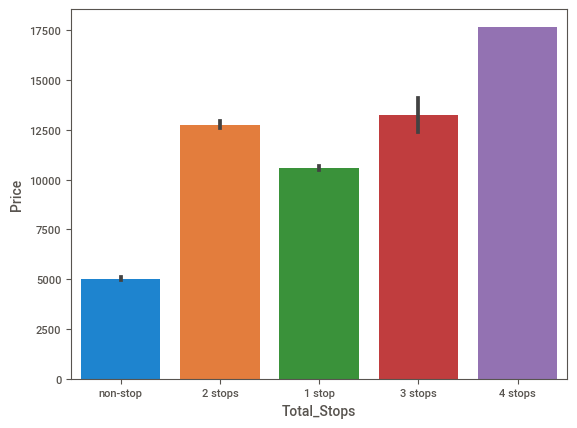

In [66]:
sns.barplot(x=data['Total_Stops'],y=data['Price'],data=data)
plt.show()

In [67]:
# This code use for encoding categorical data
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
data.loc[:,'Total_Stops']=lb.fit_transform(data.loc[:,'Total_Stops'])

In [68]:
data['Total_Stops'].value_counts()

Total_Stops
0    5625
4    3475
1    1318
2      43
3       1
Name: count, dtype: int64

### Additional_Info

In [69]:
data['Additional_Info'].value_counts()

Additional_Info
No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

In [70]:
data.drop(['Additional_Info','Route'],axis=1,inplace=True)

In [71]:
data.head()

,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,4,3897,24,3,22,20,1,10,2,50,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,1,7662,1,5,5,50,13,15,7,25,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,1,13882,9,6,9,25,4,25,19,0,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
3,0,6218,12,5,18,5,23,30,5,25,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,0,13302,1,3,16,50,21,35,4,45,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


## Feature Selection

Finding out the best feature which will contribute and have good relation with target variable.
Following are some of the feature selection methods,


1. <span style="color: purple;">**heatmap**</span>
2. <span style="color: purple;">**feature_importance_**</span>
3. <span style="color: purple;">**SelectKBest**</span>

In [72]:
data.shape

(10462, 30)

In [73]:
data.columns

Index(['Total_Stops', 'Price', 'Journey_Day', 'Journey_Month',
       'Dep_Time_in_hours', 'Dep_Time_in_minutes', 'Arrival_Time_in_hours',
       'Arrival_Time_in_minutes', 'Duration_hours', 'Duration_mins',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

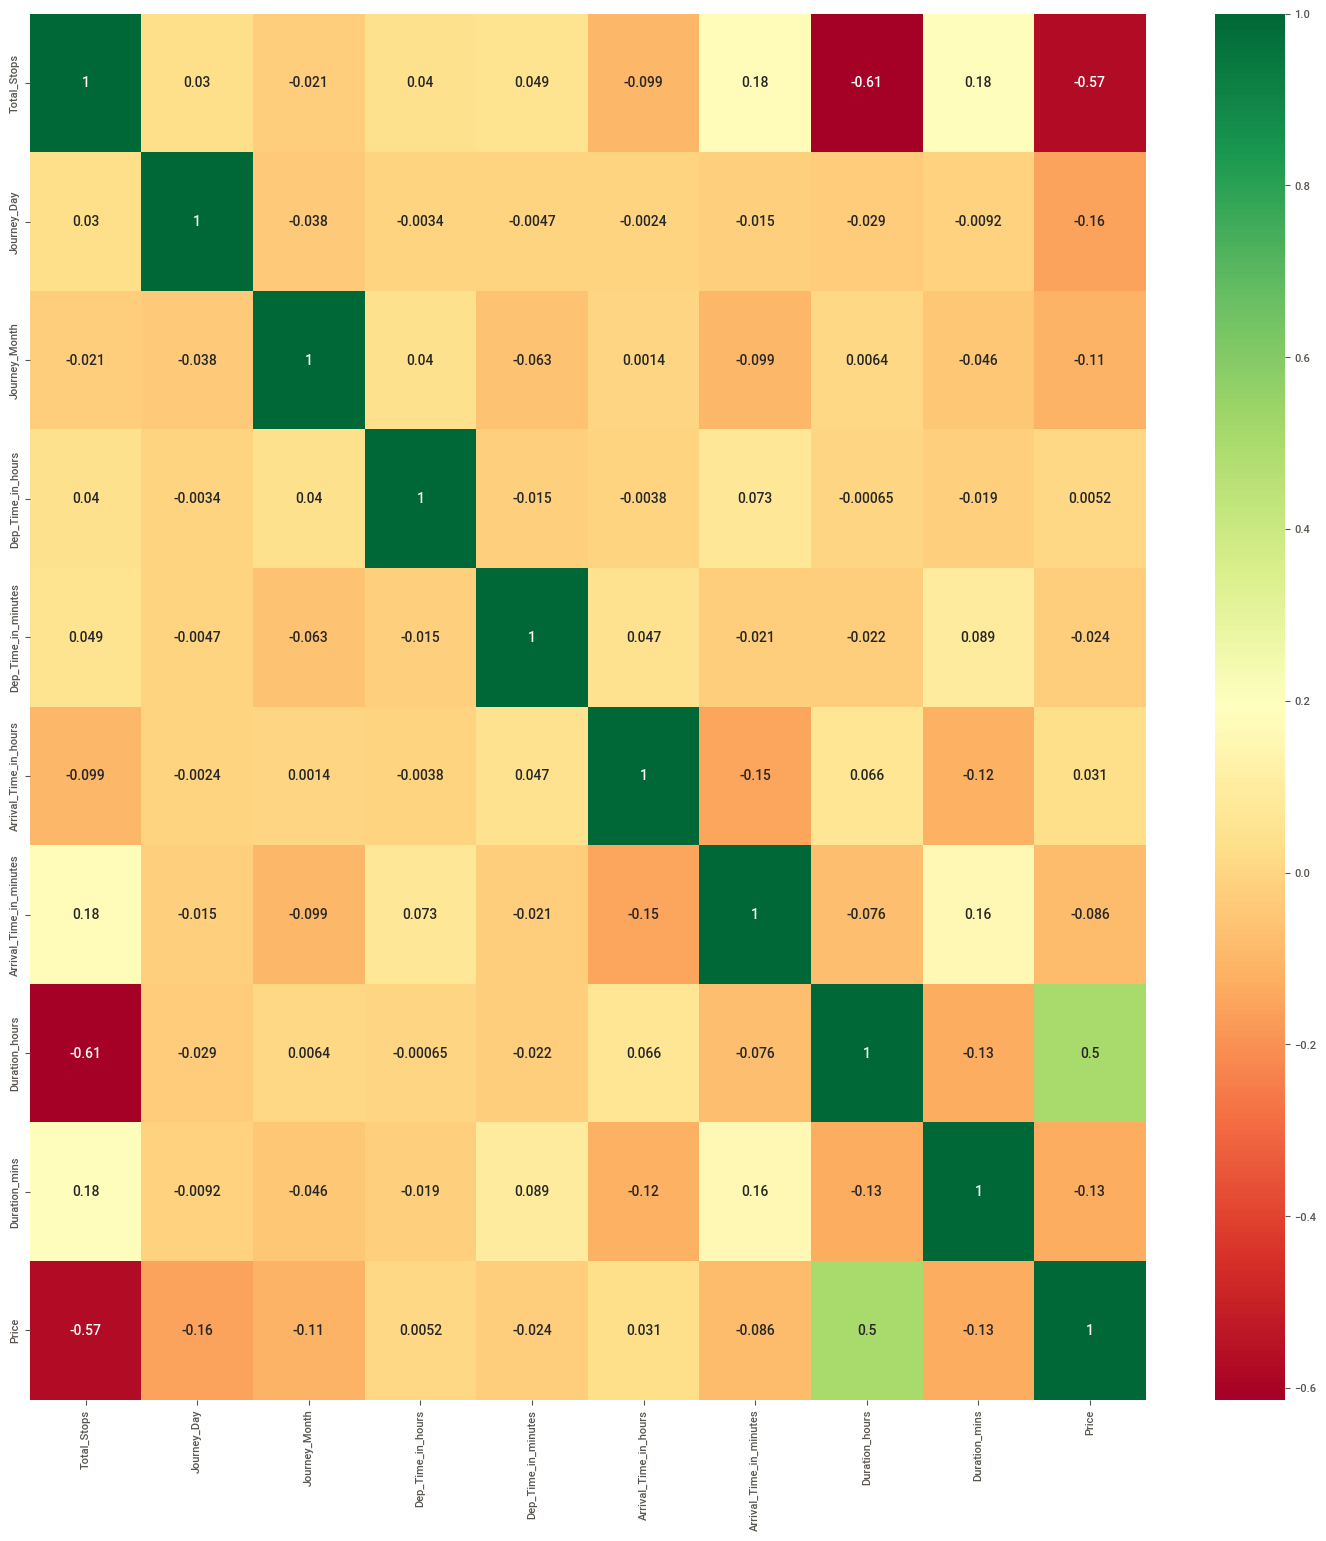

In [74]:
# Finds correlation between Independent and dependent attributes
New_data=data[['Total_Stops','Journey_Day', 'Journey_Month',
       'Dep_Time_in_hours', 'Dep_Time_in_minutes', 'Arrival_Time_in_hours',
       'Arrival_Time_in_minutes', 'Duration_hours', 'Duration_mins','Price']]
plt.figure(figsize = (18,18))
sns.heatmap(New_data.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [75]:
X = data.loc[:, ['Total_Stops', 'Destination_Cochin', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Kolkata', 'Destination_New Delhi',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Journey_Day', 'Journey_Month', 'Dep_Time_in_hours',
       'Dep_Time_in_minutes', 'Arrival_Time_in_hours',
       'Arrival_Time_in_minutes', 'Duration_hours', 'Duration_mins']]
X.head()

,Total_Stops,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Journey_Day,Journey_Month,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes,Duration_hours,Duration_mins
0,4,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,24,3,22,20,1,10,2,50
1,1,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,1,5,5,50,13,15,7,25
2,1,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,9,6,9,25,4,25,19,0
3,0,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,12,5,18,5,23,30,5,25
4,0,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,1,3,16,50,21,35,4,45


In [76]:
y = data.loc[:, ['Price']]
y.head()

,Price
0,3897
1,7662
2,13882
3,6218
4,13302


In [77]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [78]:
print(selection.feature_importances_)

[3.56767718e-01 2.63315052e-03 3.12274319e-03 5.48375912e-03
 4.10526640e-04 2.51738049e-02 6.23647089e-04 4.09060637e-03
 3.54623956e-03 5.30802840e-03 7.79850445e-03 1.71483955e-03
 2.23950713e-02 9.90840176e-02 6.63822045e-02 1.77601949e-02
 8.95274370e-04 2.98843253e-03 1.31922412e-04 4.97243424e-03
 7.47259557e-05 1.44093763e-01 5.35709001e-02 2.46271807e-02
 2.14721451e-02 2.83319087e-02 1.87838890e-02 6.08740388e-02
 1.68883288e-02]


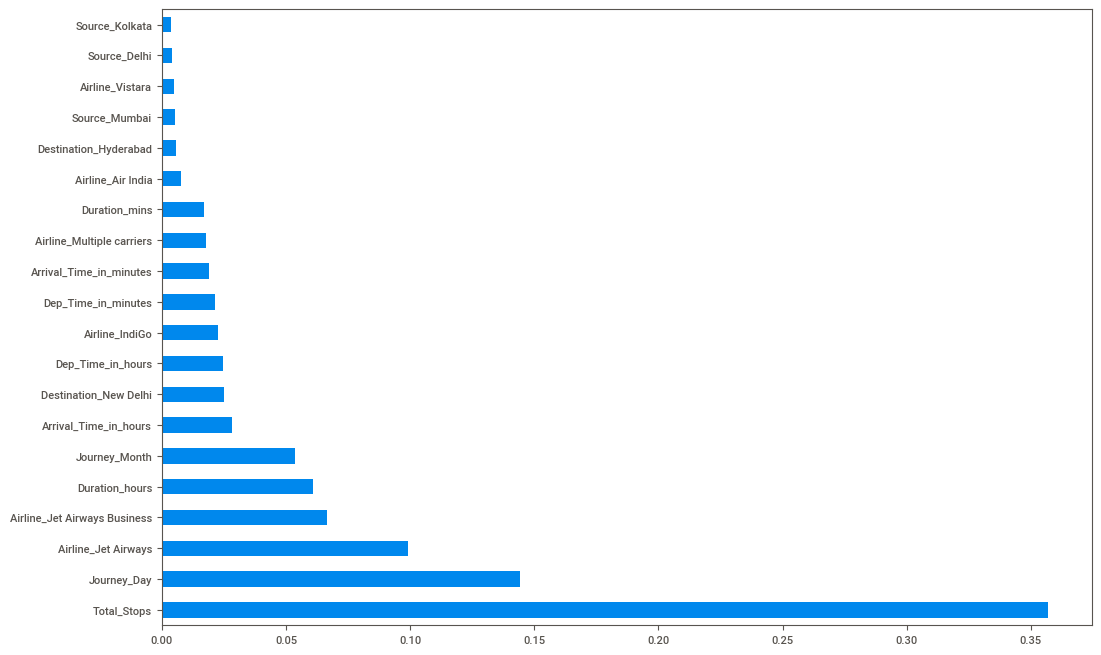

In [79]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

## Data Spliting

In [80]:
# Splitting data into train and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [81]:
#Required Library In Model Creation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,accuracy_score

## Linear Regression Model

In [82]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

In [83]:
r2score_lr=r2_score(y_test,y_pred_lr)

In [84]:
r2score_lr

0.5470927089088311

In [85]:
# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
mse_lr

9443242.192820469

Adjusted R2 = 1 – [ (1-R2)* (n-1)/ (n-k-1)] 

where: R2: The R2 of the model. n: The number of observations. k: The number of predictor variables.

In [86]:
data.shape

(10462, 30)

In [87]:
adjusted_r2_lr = 1-(1-0.5470)*(10462-1)/(10462-30-1)
adjusted_r2_lr

0.5456971527178602

In [88]:
# Model Evaluation
y_pred_lr = lr_model.predict(X_test)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
print(f"Mean Absolute Error: {mae_lr:.2f}")

Mean Absolute Error: 2114.49


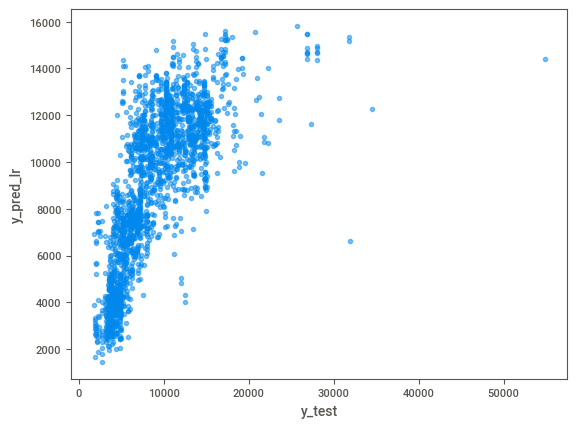

In [89]:
plt.scatter(y_test, y_pred_lr, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred_lr")
plt.show()

In [90]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_lr))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_lr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr)))

MAE: 2114.491850968691
MSE: 9443242.192820469
RMSE: 3072.985875792544


In [91]:
# RMSE/(max(DV)-min(DV))

3072.9858/(y.max()-y.min())

Price    0.039522
dtype: float64

## Decision Tree Regressor Model

In [92]:
# Train a Decision Tree model
dt_model = DecisionTreeRegressor(random_state=40)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

In [93]:
r2score_dt=r2_score(y_test,y_pred_dt)

In [94]:
r2score_dt

0.7127240436753302

In [95]:
adjusted_r2_dt = 1-(1-0.7127)*(10462-1)/(10462-30-1)
adjusted_r2_dt

0.711873712970952

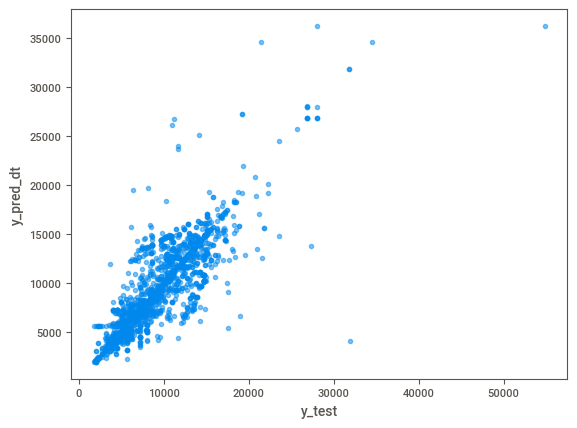

In [96]:
plt.scatter(y_test, y_pred_dt, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred_dt")
plt.show()

In [97]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_dt))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_dt))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_dt)))

MAE: 1385.7069198917025
MSE: 5989783.086097176
RMSE: 2447.403335393898


In [98]:
# RMSE/(max(DV)-min(DV))

2463.3831/(y.max()-y.min())

Price    0.031682
dtype: float64

## KNN Model

In [99]:
# KNN Tree model
knn_model = KNeighborsRegressor(n_neighbors = 8)
knn_model.fit(X_train, y_train)  #fit the model

# Make predictions
y_pred_knn=knn_model.predict(X_test)

In [100]:
r2score_knn=r2_score(y_test,y_pred_knn)
r2score_knn

0.5434808116699635

In [101]:
adjusted_r2_knn = 1-(1-0.5434)*(10462-1)/(10462-30-1)
adjusted_r2_knn

0.5420867989646246

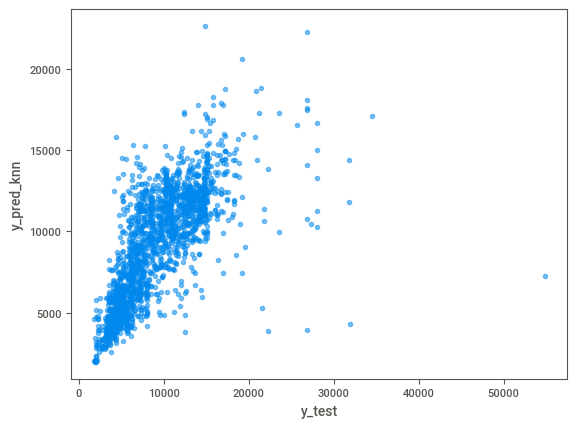

In [102]:
plt.scatter(y_test, y_pred_knn, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred_knn")
plt.show()

In [103]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_knn))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_knn))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_knn)))

MAE: 1961.3402412804587
MSE: 9518551.248499462
RMSE: 3085.214943646465


In [104]:
# RMSE/(max(DV)-min(DV))

3085.2149/(y.max()-y.min())

Price    0.03968
dtype: float64

## Random Forest

In [105]:
# Train a random forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

In [106]:
r2score_rf=r2_score(y_test,y_pred_rf)
r2score_rf

0.812460592943596

In [107]:
adjusted_r2_rf = 1-(1-0.8124)*(10462-1)/(10462-30-1)
adjusted_r2_rf

0.8118604544147253

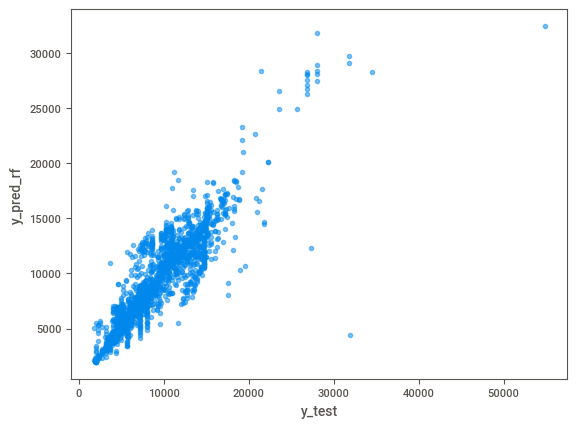

In [108]:
plt.scatter(y_test, y_pred_rf, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred_rf")
plt.show()

In [109]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_rf))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_rf))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)))

MAE: 1183.3776038192311
MSE: 3910248.4688750026
RMSE: 1977.4348203859977


In [110]:
# RMSE/(max(DV)-min(DV))

1977.4348/(y.max()-y.min())

Price    0.025432
dtype: float64

## Hyperparameter Tuning


* Choose following method for hyperparameter tuning
    1. **RandomizedSearchCV** --> Fast
    2. **GridSearchCV**
* Assign hyperparameters in form of dictionery
* Fit the model
* Check best paramters and best score

In [111]:
from sklearn.model_selection import RandomizedSearchCV

In [112]:
rf = RandomForestRegressor(random_state=42)

In [113]:
# Define hyperparameter grid
random_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [114]:
# Randomized search
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, verbose=2)

In [115]:
# Best hyperparameters
best_params = rf_random.best_params_
print(f"Best Hyperparameters: {best_params}")

# Predictions using best model
y_pred = rf_random.predict(X_test)

# Model evaluation
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"R2 Score: {r2:.2f}")

Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 20}
Mean Absolute Error: 1143.66
R2 Score: 0.83


In [116]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1143.6617439415152
MSE: 3614106.7327274443
RMSE: 1901.0804119572229


## Model Comparison Report

In [117]:
from tabulate import tabulate

# Example data
data1= [
    ("r2score", 0.5470,0.7127, 0.5434, 0.8124)
]
headers = ["Clusters ", "Linear Regression","Decision Tree Regressor","KNN","Random Forest Regression"]

# Generate first table
table1 = tabulate(data1 ,headers=headers, tablefmt="grid")

# Print the table
print(table1)

+-------------+---------------------+---------------------------+--------+----------------------------+
| Clusters    |   Linear Regression |   Decision Tree Regressor |    KNN |   Random Forest Regression |
+=============+=====================+===========================+========+============================+
| r2score     |               0.547 |                    0.7127 | 0.5434 |                     0.8124 |
+-------------+---------------------+---------------------------+--------+----------------------------+


best are the Random Forest Regression these r2score are the 0.8124 it has the batter for any regeession algo.

and after perform HyperTuning parameter

For Random Forest Regressor,
- Before hyper tuning, R2 score = 81 %
- After hyper tuning, R2 score = 83 % 
- The value of MAE drops as well, indicating that we are successful in tunning our model.

##### Conclusion

We have used random forest regressor for training the model and improved its accuracy by doing hyperparameter tuning. As a result, we have trained our **Random Forest Regression model**, to forecast fares of flight tickets, with an R2 score of 83 %.

Achieving an R-squared score of 83% indicates that your Random Forest Regression model explains approximately 83% of the variance in the flight ticket fares, which is a strong performance. Here's how this achievement can benefit flight price prediction model:

1.Improved Accuracy: A high R-squared score suggests that your model captures a significant portion of the variability in flight   ticket prices. This means that the predictions made by model are likely to be closer to the actual ticket prices, leading to     more accurate fare predictions.

2.Enhanced Decision Making: With a reliable model in place, airlines, travel agencies, or consumers can make more informed         decisions regarding flight bookings. They can use the predicted fare values as a reference point for planning travel budgets     or comparing prices across different airlines and routes.

3.Optimized Revenue Management: Airlines can use accurate fare predictions to optimize revenue management strategies. By           dynamically adjusting ticket prices based on demand forecasts and market conditions, airlines can maximize revenue while         ensuring competitive pricing.

4.Improved Customer Experience: Travelers benefit from more accurate fare predictions by being able to plan and budget for their   trips more effectively. They can make informed decisions about when to book flights to secure the best prices, resulting in a   more satisfying travel experience.

5.Competitive Advantage: A well-performing flight price prediction model can provide a competitive edge to airlines or travel     agencies in the highly competitive travel industry. Accurate fare predictions can attract customers by offering transparent     pricing and value-added services.

6.Cost Savings: By accurately forecasting flight ticket prices, airlines can optimize pricing strategies and avoid underpricing   or overpricing flights. This can lead to cost savings and improved profitability in the long run.

  Overall, achieving a high R-squared score in flight price prediction model indicates that model is effective and                 reliable, which can have significant benefits for both businesses and consumers in the airline industry.

## Challenges Faced

## Task:-1
### Data Collection and Understanding
* Load the dataset from CSV file.
* Explore the structure of the data, including columns, data types, and any missing values.
* Explore the data to understand its structure and features.
### Data Cleaning and Preprocessing
* Standardize column names.
* Handle missing values (remove them).
* Check for duplicates and remove them if necessary.
### Exploratory Data Analysis (EDA)
* Univariate Analysis
* Visualize the distribution of salaries, total compensations, and other relevant features.
* Bivariate and Multivariate Analysis
* Identify trends, patterns, and potential insights.
* Calculate summary statistics.
* Convert the ‘Date_of_Journey’ column to datetime format.
* Extract day and month features from the ‘Date_of_Journey’.
* Handle categorical variables (e.g., one-hot encoding for airlines, source, and destination).
* Convert ‘Duration’ to minutes.
## Task:-2
### Feature Selection
* Identify relevant features that impact salaries.
* Consider both numerical and categorical variables.
### Data Splitting
* Split the dataset into training and testing subsets.
### Model Selection
* Choose an appropriate regression model (e.g., linear regression, decision tree, random forest, KNN).
* Train the model using the training data.
### Model Evaluation
* Evaluate the model’s performance using metrics like Mean Absolute Error (MAE) or Root Mean Squared Error (RMSE).
### Predictions
* Use the trained model to predict salaries for new data points.
### Implement hyperparameter tuning
* for incress Accuary